In [69]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import pickle

In [3]:
df=pd.read_csv(r"C:\Users\Nour Shosharah\Downloads\Telegram Desktop\Mlt Machine Learning section\loan_prediction.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
object_cols=df.select_dtypes(include="object")
object_cols=object_cols.drop(columns="Loan_ID")

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


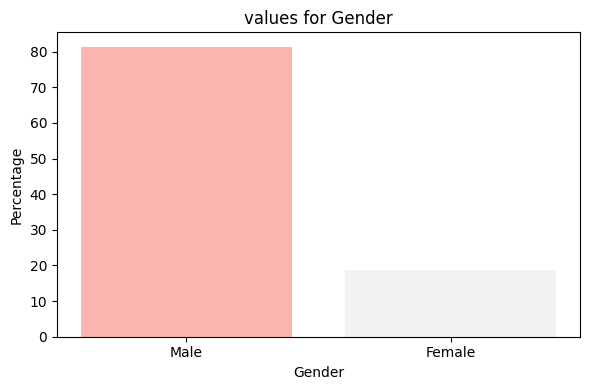

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


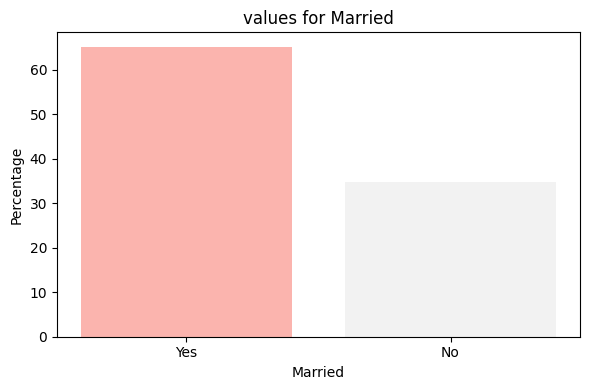

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


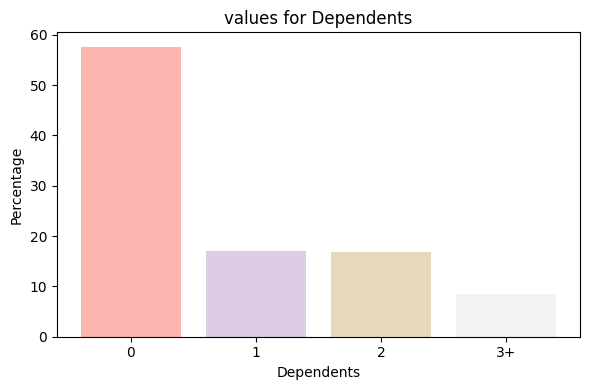

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


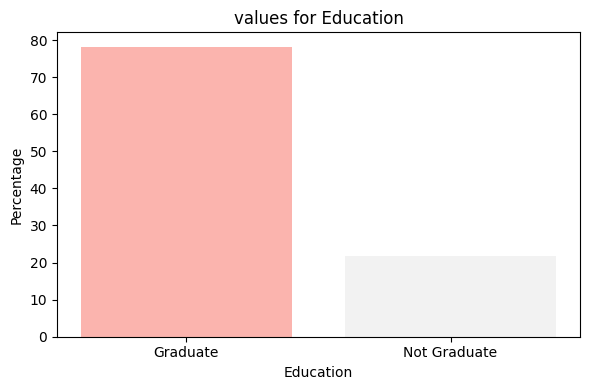

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


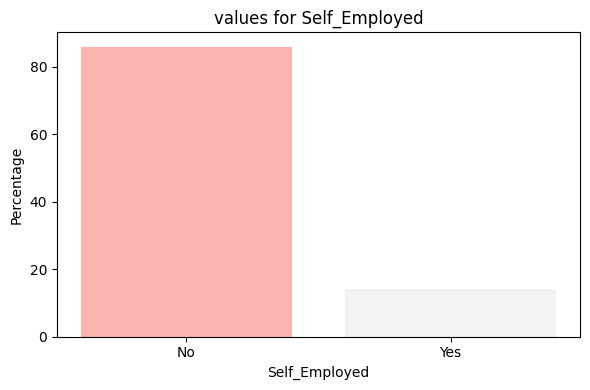

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


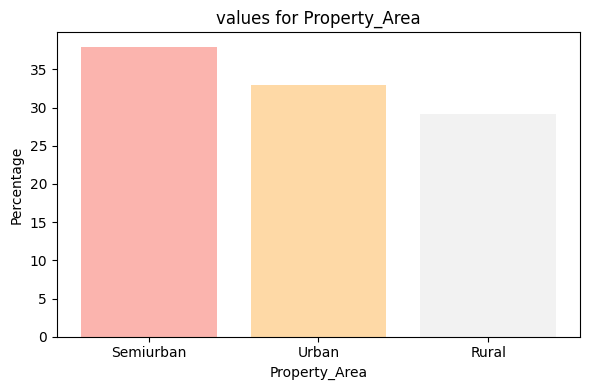

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_1964\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


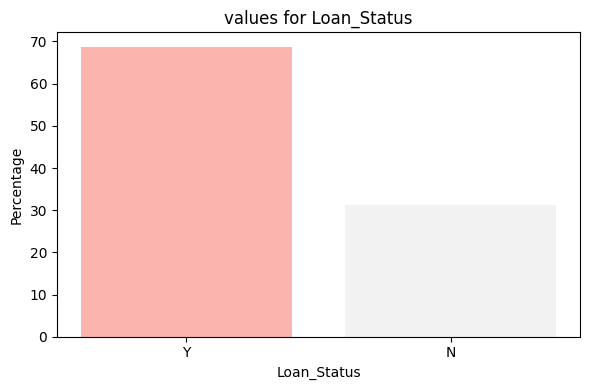

In [9]:
for col in object_cols.columns:
    value_Counts=object_cols[col].value_counts(normalize=True)*100
    labels=value_Counts.index
    values=value_Counts.values
    cmap =cm.get_cmap("Pastel1",len(labels))
    colors=[cmap(i) for i in range(len(labels))]


    plt.figure(figsize=(6,4))
    plt.bar(labels,values, color=colors)
    plt.title(f'values for {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


   


In [10]:
df.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
for col in ['Gender','Married','Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [12]:
df.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

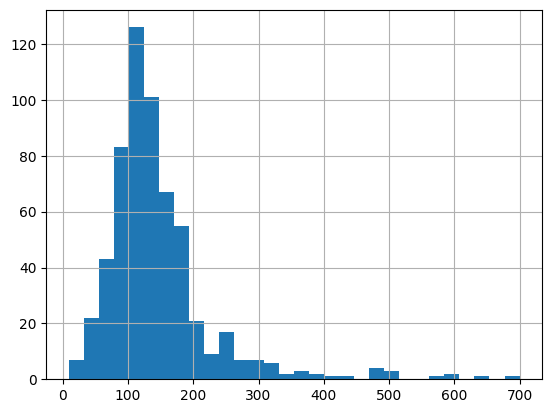

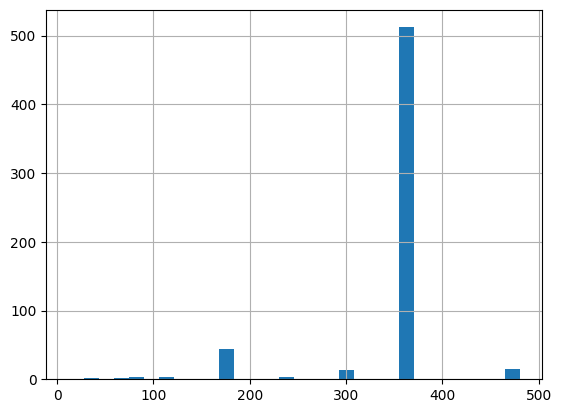

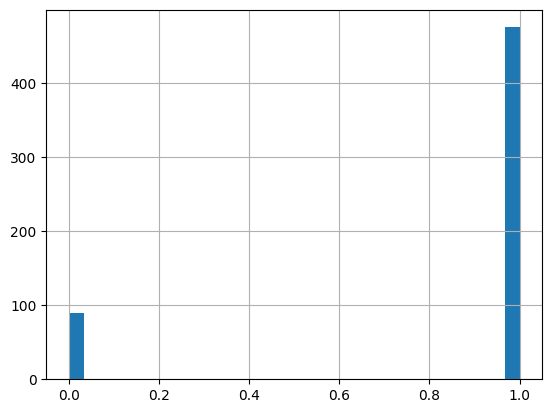

In [13]:
for col in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    df[col].hist(bins=30)
    plt.show()

In [14]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

In [15]:
df.isnull().sum()/df.shape[0]

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
df['Credit_History']=df['Credit_History'].astype("object")

In [18]:
numerical_featuers=df.select_dtypes(exclude=object)
numerical_featuers

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


ApplicantIncome


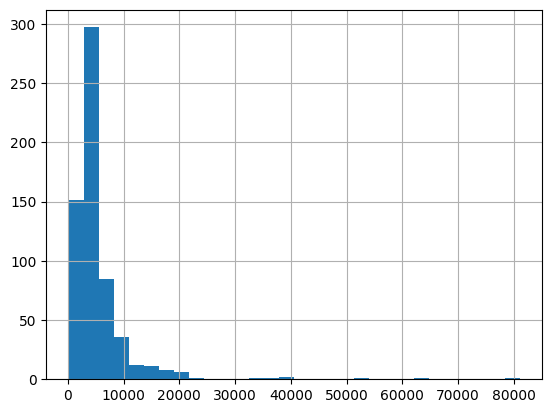

CoapplicantIncome


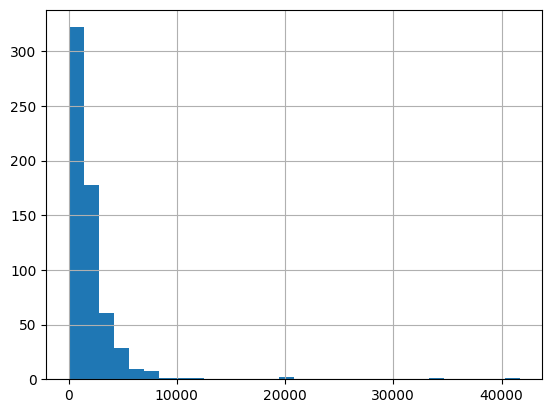

LoanAmount


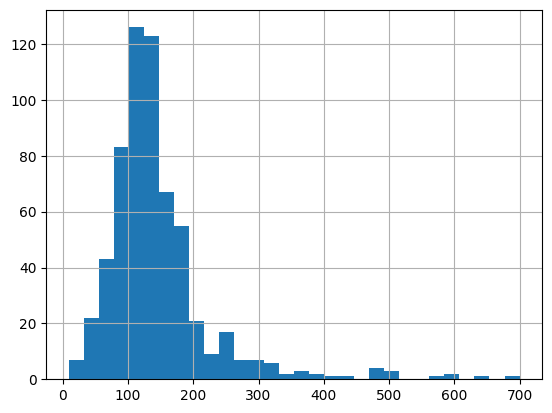

Loan_Amount_Term


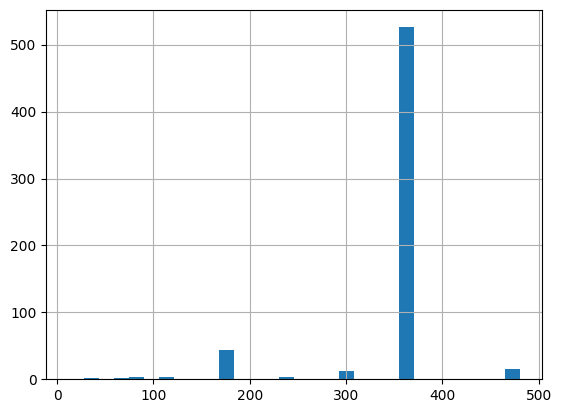

In [19]:
for col in numerical_featuers:
    df[col].hist(bins=30)
    print(col)
    plt.show()

In [20]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [21]:
for col in numerical_featuers:
    print(col)
    dfzeros=df[df[col]==0]
    print(dfzeros.shape[0])

ApplicantIncome
0
CoapplicantIncome
273
LoanAmount
0
Loan_Amount_Term
0


In [22]:
df["ApplicantIncome_log"]=np.log(df["ApplicantIncome"])
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["CoapplicantIncome_log"]=np.log1p(df["CoapplicantIncome"])

ApplicantIncome


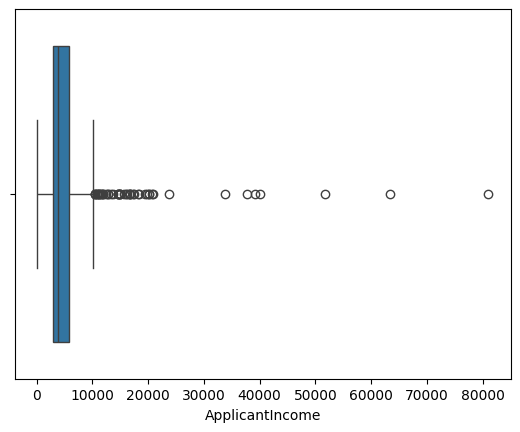

CoapplicantIncome


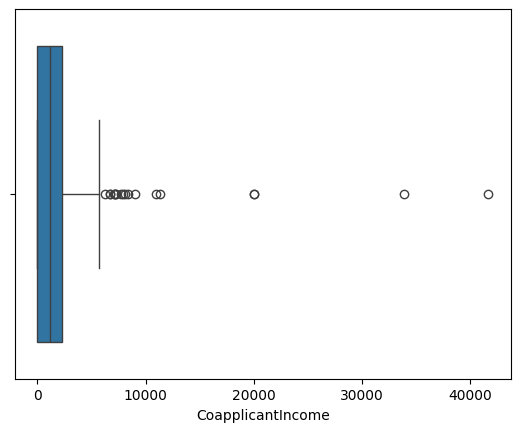

LoanAmount


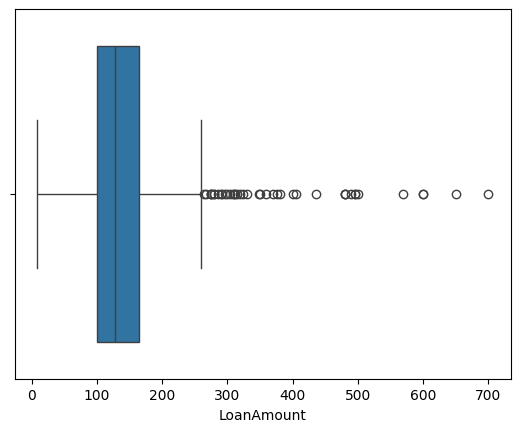

Loan_Amount_Term


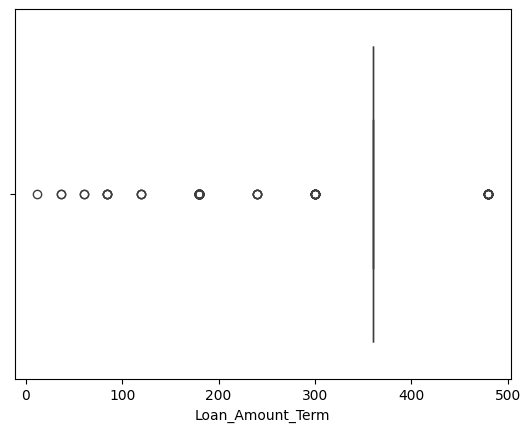

In [23]:
for col in numerical_featuers:
    print(col)
    sns.boxplot(x=df[col])
    plt.show()

In [24]:
for col in ["ApplicantIncome", "LoanAmount" , "CoapplicantIncome"]:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisper =Q1-1.5 * IQR
    upper_whisper =Q3+1.5 *IQR
    df[col+"updated"]=np.where (df[col]< lower_whisper, lower_whisper,np.where(df[col]>upper_whisper, upper_whisper, df[col]))

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,ApplicantIncomeupdated,LoanAmountupdated,CoapplicantIncomeupdated
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,4.852030,0.000000,5849.0,128.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,4.852030,7.319202,4583.0,128.0,1508.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,4.189655,0.000000,3000.0,66.0,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,4.787492,7.765993,2583.0,120.0,2358.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,4.948760,0.000000,6000.0,141.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972466,4.262680,0.000000,2900.0,71.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,8.320205,3.688879,0.000000,4106.0,40.0,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.996157,5.533389,5.484797,8072.0,253.0,240.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,8.933664,5.231109,0.000000,7583.0,187.0,0.0


In [26]:
object_cols.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,ApplicantIncomeupdated,LoanAmountupdated,CoapplicantIncomeupdated
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,4.852030,0.000000,5849.0,128.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,4.852030,7.319202,4583.0,128.0,1508.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,4.189655,0.000000,3000.0,66.0,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,4.787492,7.765993,2583.0,120.0,2358.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,4.948760,0.000000,6000.0,141.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972466,4.262680,0.000000,2900.0,71.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,8.320205,3.688879,0.000000,4106.0,40.0,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.996157,5.533389,5.484797,8072.0,253.0,240.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,8.933664,5.231109,0.000000,7583.0,187.0,0.0


In [29]:
df_encoded=pd.get_dummies(df, columns=object_cols.columns,drop_first=True)

In [30]:
df_encoded

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,ApplicantIncomeupdated,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360.0,1.0,8.674026,4.852030,0.000000,5849.0,...,True,False,False,False,False,False,False,False,True,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,8.430109,4.852030,7.319202,4583.0,...,True,True,True,False,False,False,False,False,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,8.006368,4.189655,0.000000,3000.0,...,True,True,False,False,False,False,True,False,True,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,7.856707,4.787492,7.765993,2583.0,...,True,True,False,False,False,True,False,False,True,True
4,LP001008,6000,0.0,141.0,360.0,1.0,8.699515,4.948760,0.000000,6000.0,...,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,7.972466,4.262680,0.000000,2900.0,...,False,False,False,False,False,False,False,False,False,True
610,LP002979,4106,0.0,40.0,180.0,1.0,8.320205,3.688879,0.000000,4106.0,...,True,True,False,False,True,False,False,False,False,True
611,LP002983,8072,240.0,253.0,360.0,1.0,8.996157,5.533389,5.484797,8072.0,...,True,True,True,False,False,False,False,False,True,True
612,LP002984,7583,0.0,187.0,360.0,1.0,8.933664,5.231109,0.000000,7583.0,...,True,True,False,True,False,False,False,False,True,True


In [31]:
df_encoded["Total_income"]=df_encoded["ApplicantIncomeupdated"]+df_encoded["CoapplicantIncomeupdated"]

In [32]:
df_encoded["month_payment"]=df_encoded["LoanAmountupdated"]/df_encoded["Loan_Amount_Term"]

In [33]:
cols_to_Scale=["ApplicantIncomeupdated" , "CoapplicantIncomeupdated","LoanAmountupdated","Total_income"]
scaler=StandardScaler()
df_encoded[cols_to_Scale]=scaler.fit_transform(df_encoded[cols_to_Scale])

In [34]:
df_encoded["Loan_Status_Y"].value_counts(normalize=True)

Loan_Status_Y
True     0.687296
False    0.312704
Name: proportion, dtype: float64

In [35]:
df_encoded.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'ApplicantIncome_log',
       'LoanAmount_log', 'CoapplicantIncome_log', 'ApplicantIncomeupdated',
       'LoanAmountupdated', 'CoapplicantIncomeupdated', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Total_income', 'month_payment'],
      dtype='object')

In [52]:
featuers=[ 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_income', 'month_payment']

target=df_encoded.Loan_Status_Y
X=df_encoded[featuers]
y=target

In [53]:
corrlation_mat=X.copy()
corrlation_mat["Laoan_status"]=y
corrlation_mat.corr()["Laoan_status"]

Credit_History             0.540556
Gender_Male                0.017987
Married_Yes                0.091478
Dependents_1              -0.038740
Dependents_2               0.062384
Dependents_3+             -0.026123
Education_Not Graduate    -0.085884
Self_Employed_Yes         -0.003700
Property_Area_Semiurban    0.136540
Property_Area_Urban       -0.043621
Total_income               0.006971
month_payment             -0.014647
Laoan_status               1.000000
Name: Laoan_status, dtype: float64

<Axes: >

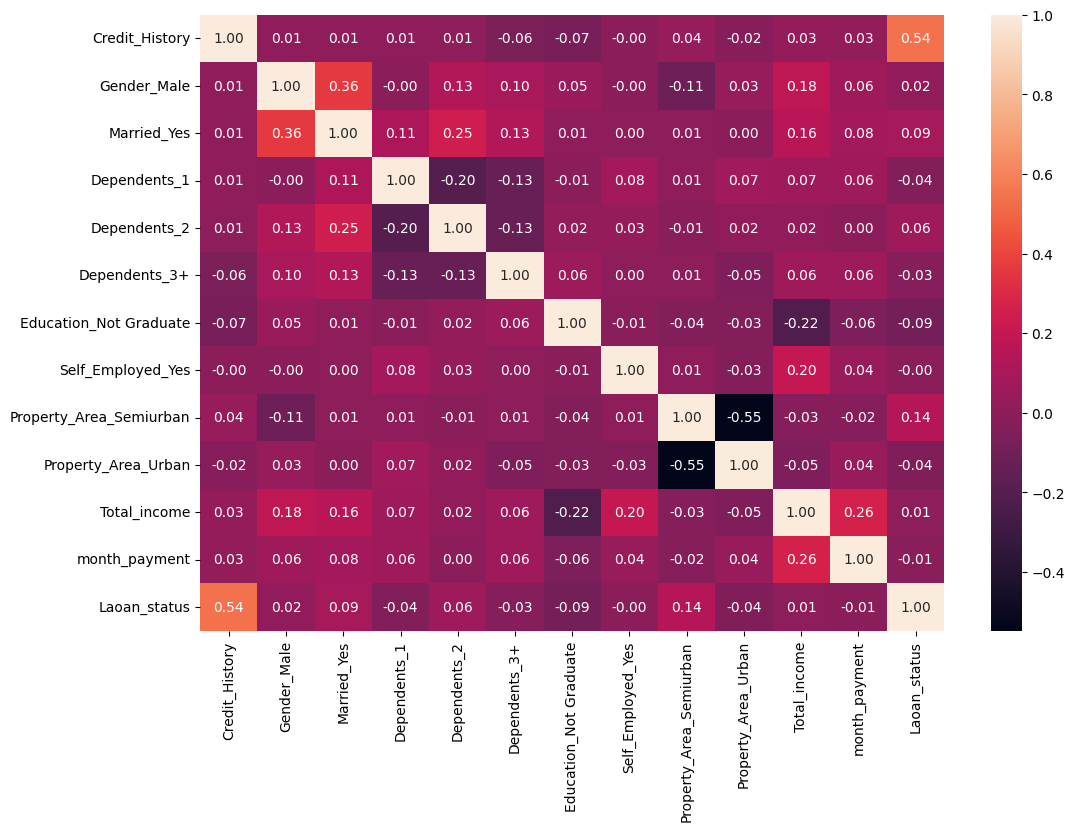

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(corrlation_mat.corr(),annot=True,fmt=".2f")

In [65]:
X_train , X_test , y_train , y_test=train_test_split(X, y ,test_size=0.2, stratify=y, random_state=42)

In [66]:
models={"LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
        "DecisionTree":DecisionTreeClassifier(max_depth=4, random_state=42),

}

In [72]:
for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy_=accuracy_score(y_test, y_pred)
    print(accuracy_)
    print("classification report")
    print(classification_report(y_test,y_pred))
    file_name=f"{name}_mode.pkl"
    with open(file_name,'wb') as f:
        pickle.dump(model,f)
    print("ended")



LogisticRegression
0.8536585365853658
classification report
              precision    recall  f1-score   support

       False       0.95      0.55      0.70        38
        True       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

ended
DecisionTree
0.8048780487804879
classification report
              precision    recall  f1-score   support

       False       0.71      0.63      0.67        38
        True       0.84      0.88      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123

ended


In [ ]:
with open ()